## Contents  
- import  
- subset 
- decomposition  
- 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
path = r"C:\Users\Kieran\Documents\Career Foundry\Data Immersion\6.0 Advanced Analyics & Dashboard Design"

In [33]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'covid_full.csv'))

In [34]:
df.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,24/02/2020,1.0,1.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,1,AFG,Asia,Afghanistan,25/02/2020,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,2,AFG,Asia,Afghanistan,26/02/2020,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,3,AFG,Asia,Afghanistan,27/02/2020,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,4,AFG,Asia,Afghanistan,28/02/2020,1.0,0.0,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [35]:
df.shape

(72096, 60)

### Subset

In [36]:
# UK only df

df_uk = df[df['location'] == 'United Kingdom']

In [37]:
df_uk.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
67932,67932,GBR,Europe,United Kingdom,31/01/2020,2.0,2.0,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
67933,67933,GBR,Europe,United Kingdom,01/02/2020,2.0,0.0,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
67934,67934,GBR,Europe,United Kingdom,02/02/2020,2.0,0.0,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
67935,67935,GBR,Europe,United Kingdom,03/02/2020,8.0,6.0,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
67936,67936,GBR,Europe,United Kingdom,04/02/2020,8.0,0.0,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


In [38]:
df_uk.shape

(396, 60)

In [39]:
# setting date as index

from datetime import datetime

df_uk['datetime'] = pd.to_datetime(df_uk['date']) # Create a datetime column from "Date.""
df_uk = df_uk.set_index('datetime') # Set the datetime as the index of the dataframe.
df_uk.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_uk.head()

,Unnamed: 0,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-31,67932,GBR,Europe,United Kingdom,2.0,2.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2020-01-02,67933,GBR,Europe,United Kingdom,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2020-02-02,67934,GBR,Europe,United Kingdom,2.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2020-03-02,67935,GBR,Europe,United Kingdom,8.0,6.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2020-04-02,67936,GBR,Europe,United Kingdom,8.0,0.0,NaN,NaN,NaN,NaN,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


### just looking at new cases

In [40]:
df_cases = pd.DataFrame(df_uk['new_cases'])

In [41]:
df_cases.head()

,new_cases
datetime,
2020-01-31,2.0
2020-01-02,0.0
2020-02-02,0.0
2020-03-02,6.0
2020-04-02,0.0


In [42]:
type(df_cases)

pandas.core.frame.DataFrame

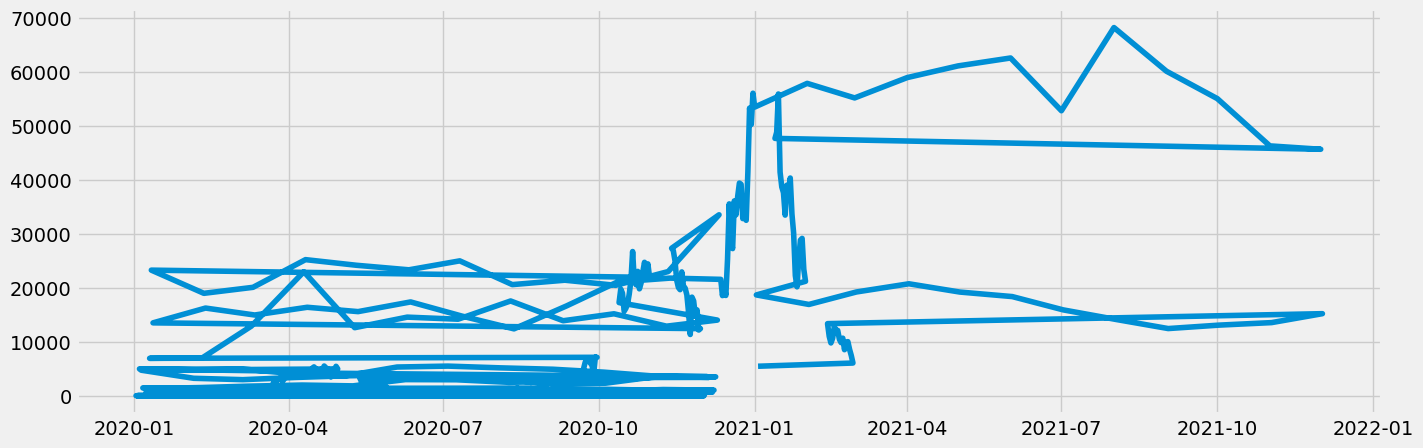

In [43]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_cases)

<AxesSubplot:xlabel='datetime', ylabel='new_cases'>

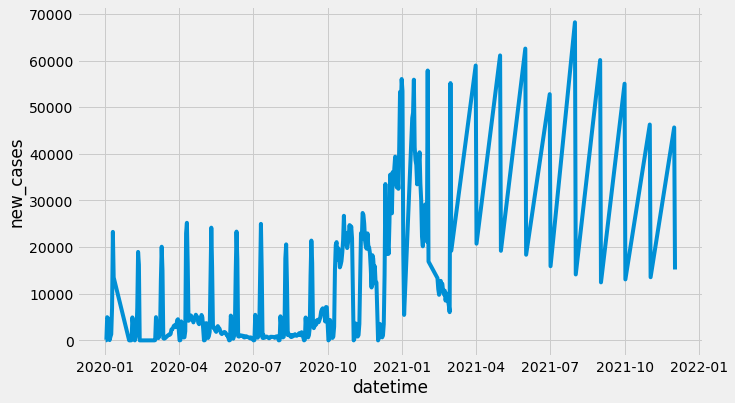

In [48]:
plt.figure(figsize=(15,5))
sns.lineplot(x='datetime', y='new_cases', data=df_cases)

It looks like the plot is predicting values in to the future. I will adjust.

In [49]:
df_2 = df_cases.reset_index()

In [50]:
df_2.head()

,datetime,new_cases
0,2020-01-31,2.0
1,2020-01-02,0.0
2,2020-02-02,0.0
3,2020-03-02,6.0
4,2020-04-02,0.0


In [51]:
df_sub = df_2.loc[(df_2['datetime'] >= '2020-01-31') & (df_2['datetime'] < '2021-02-01')]

I will re set the datetime column as the index for df_sub

In [53]:
df_sub2 = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.

df_sub2.head()

,new_cases
datetime,
2020-01-31,2.0
2020-02-02,0.0
2020-03-02,6.0
2020-04-02,0.0
2020-05-02,1.0


<AxesSubplot:xlabel='datetime', ylabel='new_cases'>

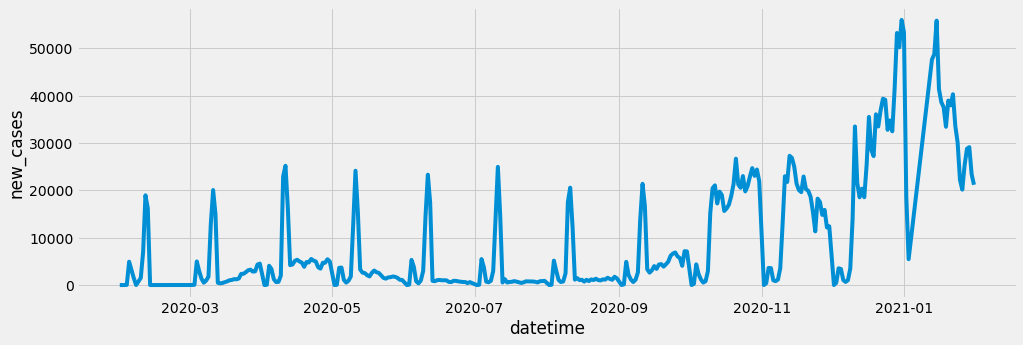

In [54]:
plt.figure(figsize=(15,5))
sns.lineplot(x='datetime', y='new_cases', data=df_sub2)

# Decomposition

In [78]:
decomposition = sm.tsa.seasonal_decompose(df_sub2, period=1, model='additive')

In [76]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

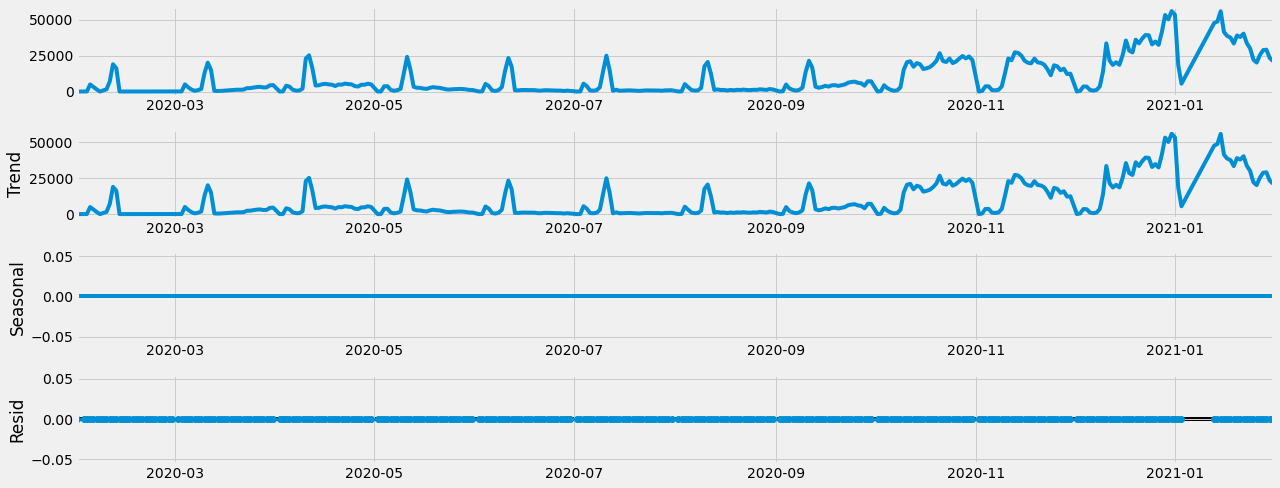

In [79]:
# Plot the separate components

decomposition.plot()
plt.show()

# Testing for stationarity

In [80]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub2['new_cases'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.119918
p-value                          0.236581
Number of Lags Used              5.000000
Number of Observations Used    341.000000
Critical Value (1%)             -3.449673
Critical Value (5%)             -2.870053
Critical Value (10%)            -2.571306
dtype: float64


Test statistic is larger than the critical values so we cannot reject the null. A unit root is present. Data is non-stationary.

# Plotting autocorrelation

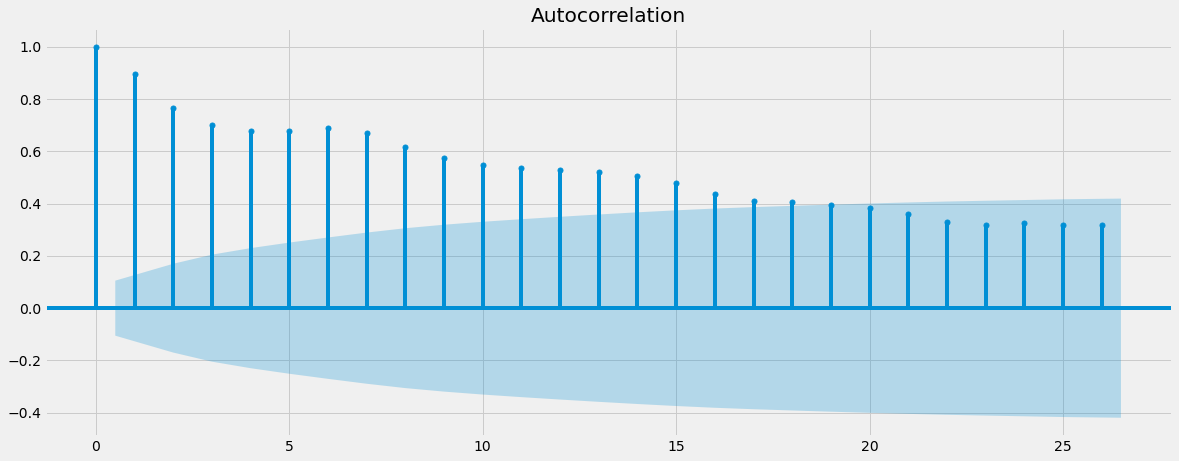

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub2)
plt.show()

# Differecning

In [86]:
data_diff = df_sub2['new_cases'] - df_sub2['new_cases'].shift(1)

In [87]:
data_diff.dropna(inplace = True) # dropping missing values created by differencing

In [89]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.291296e+01
p-value                        4.020816e-24
Number of Lags Used            4.000000e+00
Number of Observations Used    3.410000e+02
Critical Value (1%)           -3.449673e+00
Critical Value (5%)           -2.870053e+00
Critical Value (10%)          -2.571306e+00
dtype: float64


Test stat is now lower than critical value, data is stationary. 

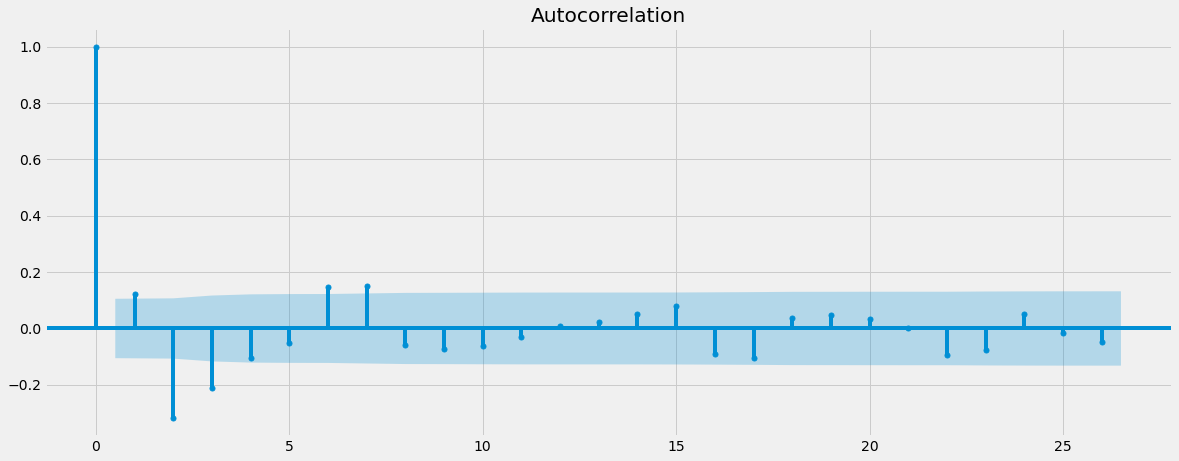

In [90]:
plot_acf(data_diff)
plt.show()